In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#!pip install seaborn
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

file_path = "sqf-2023-cleaned-with-features-FINAL.csv"

df_cleaned = pd.read_csv(file_path)

df_cleaned.head()

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,...,AGE_GROUP_18-30,AGE_GROUP_31-45,AGE_GROUP_46-60,AGE_GROUP_60+,TIME_OF_DAY_Afternoon,TIME_OF_DAY_Evening,TIME_OF_DAY_Morning,TIME_OF_DAY_Night,FRISKED_AND_ARRESTED,FRISKED_AND_ARRESTED_CAT
0,1,2023-01-01,00:44:00,2023,January,Sunday,APP,POM,804,SGT,...,0,1,0,0,0,0,0,1,0,Frisked Only
1,2,2023-01-01,00:49:00,2023,January,Sunday,APP,POM,69,SGT,...,1,0,0,0,0,0,0,1,1,Frisked and Arrested
2,3,2023-01-01,05:31:00,2023,January,Sunday,APP,POM,83,SGT,...,0,1,0,0,0,0,1,0,0,Frisked Only
3,4,2023-01-01,04:59:00,2023,January,Sunday,APP,POM,113,SGT,...,1,0,0,0,0,0,0,1,0,Frisked Only
4,5,2023-01-01,05:21:00,2023,January,Sunday,APP,POF,46,SGT,...,1,0,0,0,0,0,1,0,1,Frisked and Arrested


In [2]:
X = df_cleaned[[
    'AGE_GROUP_18-30', 
    'AGE_GROUP_31-45',
    'AGE_GROUP_46-60', 
    'AGE_GROUP_60+', 
    'SUSPECT_SEX_FEMALE',
    'SUSPECT_SEX_MALE',
    'SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE',
    'SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER',
    'SUSPECT_RACE_DESCRIPTION_BLACK',
    'SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC',
    'SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN',
    'SUSPECT_RACE_DESCRIPTION_WHITE',
    'SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC',
    'TIME_OF_DAY_Evening',
    'TIME_OF_DAY_Morning', 
    'TIME_OF_DAY_Night',
    'STOP_DURATION_MINUTES',
    'STOP_LOCATION_BORO_NAME_BRONX',
    'STOP_LOCATION_BORO_NAME_BROOKLYN',
    'STOP_LOCATION_BORO_NAME_MANHATTAN',
    'STOP_LOCATION_BORO_NAME_QUEENS',
    'STOP_LOCATION_BORO_NAME_STATEN ISLAND',
    'OFFICER_EXPLAINED_STOP_FLAG',
    'OFFICER_IN_UNIFORM_FLAG',
    'OTHER_PERSON_STOPPED_FLAG',
    'DEMEANOR_SCORE',
    'COMPLIANCE_SCORE',
    'SUSPECTED_CRIME_DESCRIPTION_ASSAULT',
    'SUSPECTED_CRIME_DESCRIPTION_AUTO STRIPPIG',
    'SUSPECTED_CRIME_DESCRIPTION_BURGLARY',
    'SUSPECTED_CRIME_DESCRIPTION_CPSP',
    'SUSPECTED_CRIME_DESCRIPTION_CPW',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL MISCHIEF',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF FORGED INSTRUMENT',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF MARIHUANA',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL TRESPASS',
    'SUSPECTED_CRIME_DESCRIPTION_FORCIBLE TOUCHING',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY AUTO',
    'SUSPECTED_CRIME_DESCRIPTION_MAKING GRAFFITI',
    'SUSPECTED_CRIME_DESCRIPTION_MENACING',
    'SUSPECTED_CRIME_DESCRIPTION_MURDER',
    'SUSPECTED_CRIME_DESCRIPTION_OTHER',
    'SUSPECTED_CRIME_DESCRIPTION_PETIT LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_RAPE',
    'SUSPECTED_CRIME_DESCRIPTION_RECKLESS ENDANGERMENT',
    'SUSPECTED_CRIME_DESCRIPTION_ROBBERY',
    'SUSPECTED_CRIME_DESCRIPTION_TERRORISM',
    'SUSPECTED_CRIME_DESCRIPTION_THEFT OF SERVICES',
    'SUSPECTED_CRIME_DESCRIPTION_UNAUTHORIZED USE OF A VEHICLE'
]]

In [3]:
y = df_cleaned['FRISKED_AND_ARRESTED']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,  #num trees
    max_depth=None,    #all leaves are pure or contain < min_samples_split
    random_state=42,   
    class_weight='balanced',
    verbose=0
)

In [6]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8149675898644667


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#RF model
rf_model = RandomForestClassifier(random_state=42)

#hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # n
    'max_depth': [10, 20, None],  # depth of trees
    'min_samples_split': [2, 5, 10],  #minimum samples to split
    'min_samples_leaf': [1, 2, 4],  #leaf minimum samples
    'max_features': ['auto', 'sqrt', 'log2'],  #features to consider
    'bootstrap': [True, False]  #bootstrap sampling
}

#GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, verbose=2, n_jobs=-1, scoring='roc_auc')  

#fit grid search to the data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; tot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
499 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [9]:
best_rf_model = grid_search.best_estimator_

#make predictions
y_pred = best_rf_model.predict(X_test)

#evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.851797289334119


In [10]:
from sklearn.metrics import f1_score, classification_report

#labels for the test set
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2890
           1       0.42      0.17      0.24       504

    accuracy                           0.84      3394
   macro avg       0.65      0.57      0.58      3394
weighted avg       0.80      0.84      0.81      3394



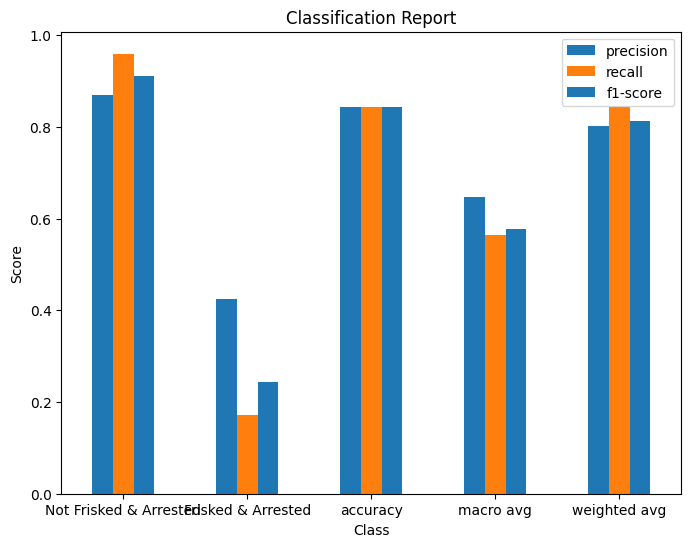

In [11]:
from sklearn.metrics import classification_report

#classification report
report = classification_report(y_test, y_pred, target_names=['Not Frisked & Arrested', 'Frisked & Arrested'], output_dict=True)

# Plotting the classification report as a bar chart
report_df = pd.DataFrame(report).transpose()

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

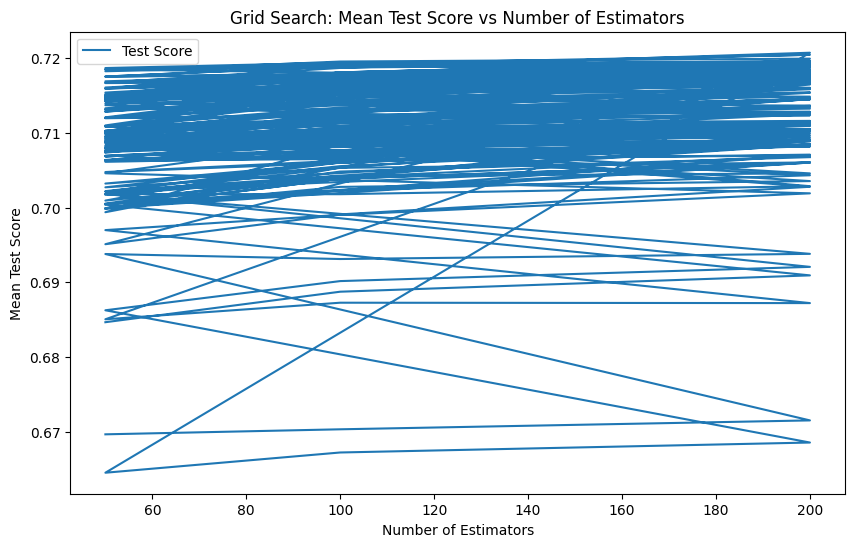

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#extracting grid search results
grid_results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(grid_results['param_n_estimators'], grid_results['mean_test_score'], label='Test Score')
plt.title('Grid Search: Mean Test Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()

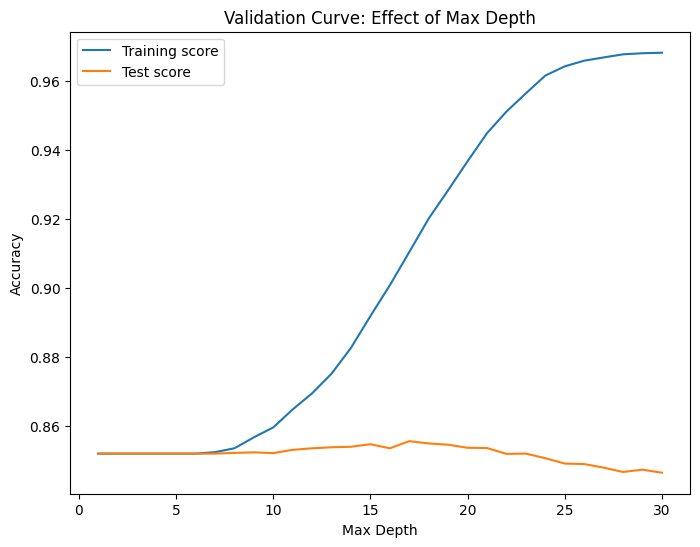

In [13]:
from sklearn.model_selection import validation_curve

#validation curve for the 'max_depth' hyperparameter
param_range = range(1, 31) 
train_scores, test_scores = validation_curve(rf_model, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Test score')
plt.title('Validation Curve: Effect of Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()